# CNN

In [1]:
import tensorflow as tf
import keras
tf.__version__

Using TensorFlow backend.


'1.15.0'

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14865430508941650972
]


In [5]:
K.set_image_data_format('channels_first')

NameError: name 'K' is not defined

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28,28
(x_train, y_train), (x_test, y_test)=mnist.load_data()

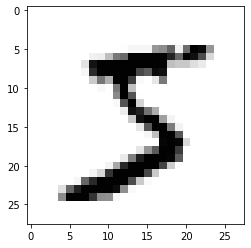

In [17]:
first_image = x_train[0, :, :] #x_train에 첫번째 이미지를 보고싶을때
plt.imshow(first_image, cmap=plt.cm.Greys);

In [18]:
# X_train = X_train.reshape(X_train.shape[0], 1, 28, 28) # channel_first
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28) # channel_first
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # channel_last
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) # channel_last

x_train = x_train.astype('float32') # 타입을 바꾸는 이유: 255로 나누기 위해
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [19]:
model=Sequential()

# (33,3,3) output필터개수,필터사이즈 3x3
# 입력데이터 (28,28) => (배치사이즈 128, 26필터적용, 26필터적용, 32아웃풋)
#padding은 valid(필터적용): 모서리 특징을 버릴때 ,same(28*28) :모서리 특징 유지
#relu니까 음수가 제거됨 (+)부분만
model.add(Conv2D(32,3,3,activation='relu',input_shape=(28,28,1)))#input_shape도 채널순서에 맞춰줘야한다
#(128,26,26,32) => (128,24,24,64)
model.add(Conv2D(64,3,3,activation='relu'))
#128장은 그대로 살고 24=>12, 24=>12,64그대로 (128(원래는 모르는 수?,장수),12,12,64)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#12*12*64=> 1차원으로 바껴야한다 9216
model.add(Flatten()) #flatten은 1차원 배열로
#ffnn망으로 들어옴(fc), dense 나가는 것만
model.add(Dense(128,activation='relu')) #dense망의 가중치 (128*9216)=>9216*128=>128x128
# 나가는 차수 128? . 128*128
model.add(Dropout(0.5)) #계산회로만 생략(계산만 덜하라는 거지 차수?차원?가 바뀌지 않음) #128x10
model.add(Dense(10,activation='softmax')) #128x10

C:\Users\peace\Anaconda3\envs\test_tensor\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
C:\Users\peace\Anaconda3\envs\test_tensor\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 13s 217us/step - loss: 0.2793 - acc: 0.9138 - val_loss: 0.0604 - val_acc: 0.9801
Epoch 2/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.0926 - acc: 0.9730 - val_loss: 0.0423 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.0681 - acc: 0.9791 - val_loss: 0.0375 - val_acc: 0.9872
Epoch 4/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0552 - acc: 0.9839 - val_loss: 0.0298 - val_acc: 0.9903
Epoch 5/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0483 - acc: 0.9856 - val_loss: 0.0285 - val_acc: 0.9909
Epoch 6/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.0416 - acc: 0.9873 - val_loss: 0.0267 - val_acc: 0.9909
Epoch 7/12
6

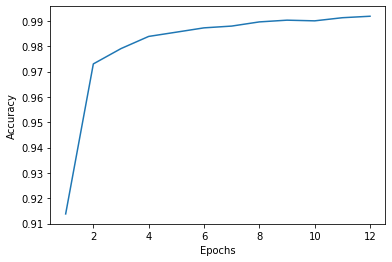

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics=['acc'])
# train, validation, test
# epoch 마다 accuracy를 저장
class AccuracyHistory(keras.callbacks.Callback): # 오버라이딩 (재정의)
    def on_train_begin(self, logs={}): # 훈련 시작시 이벤트
        self.acc = []
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        
history = AccuracyHistory()
history.on_train_begin()

model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose = 1, validation_data =(x_test, y_test), callbacks=[history])
score = model.evaluate(x_test, y_test, verbose =0)
print(score[0])
print(score[1])

plt.plot(range(1,13), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

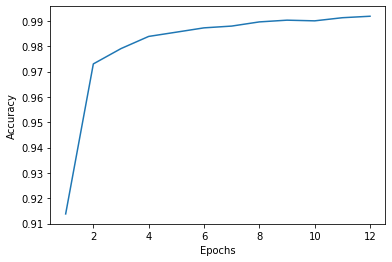

In [15]:
plt.plot(range(1,13), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
history.on_train_begin()
model.history.history.keys()

# 모델 저장 / 로딩

In [16]:
# HDFS(hadoop file system) : model 구조 전체 저장
# 가중치 구조, optimization stage 등이 저장
# json으로 저장, 구조, 가중치를 별도로 저장 => web에서 tensorflow
# tensorflow.js import
model.save("model_mnist.h5")
print("모델이 저장되었습니다.")
from keras.models import load_model

model = load_model('model_mnist.h5')
print('모델이 로딩되었습니다')

model.summary()

모델이 저장되었습니다.
모델이 로딩되었습니다
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)           

In [17]:
# 레이어 정보 확인
l1 = model.layers[0]
l2 = model.layers[1]
print(l1.name)
print(l1.input_shape)
print(l1.activation)
print(l1.output_shape)

conv2d_1
(None, 28, 28, 1)
<function relu at 0x000002685272F1E0>
(None, 26, 26, 32)


# imageDataGenerator

C:\Users\ICT01_03\Anaconda3\envs\venv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


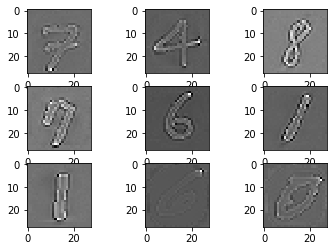

In [18]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train,y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)
# datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
# datagen = ImageDataGenerator(rotation_range=90) # 로테이션 옵션
datagen = ImageDataGenerator(zca_whitening=True) # 이미지 백색화 -> 노이즈 제거(변수간 상관도를 없앰-PCA)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break

In [19]:
# gpu 사용 가능 확인
import tensorflow as tf 
print(tf.__version__) 
tf.test.is_gpu_available()


1.15.0


True

In [20]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

170500096/170498071 [==============================] - 26s 0us/step
X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


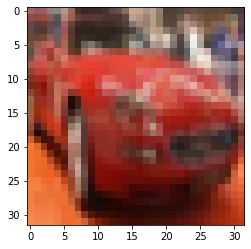

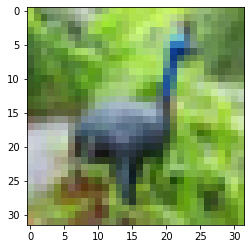

In [21]:
from keras.datasets import cifar10
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0] , 'test samples')
NB_CLASSES = 10
Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [34]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [35]:
from keras.layers import Activation
model = Sequential()
model.add(Conv2D(32, kernel_size =3, padding = 'same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size =3, padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [36]:
model.add(Conv2D(64,kernel_size=3,padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

C:\Users\ICT01_03\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        18496     
__________

In [41]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
                    verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 11s 275us/step - loss: 1.8218 - acc: 0.3396 - val_loss: 1.3994 - val_acc: 0.4915
Epoch 2/40
40000/40000 [==============================] - 10s 239us/step - loss: 1.3529 - acc: 0.5193 - val_loss: 1.1834 - val_acc: 0.5857
Epoch 3/40
40000/40000 [==============================] - 10s 240us/step - loss: 1.1367 - acc: 0.6006 - val_loss: 1.2804 - val_acc: 0.5739
Epoch 4/40
40000/40000 [==============================] - 10s 241us/step - loss: 0.9977 - acc: 0.6482 - val_loss: 0.8763 - val_acc: 0.6938
Epoch 5/40
40000/40000 [==============================] - 10s 243us/step - loss: 0.9004 - acc: 0.6854 - val_loss: 0.7965 - val_acc: 0.7251
Epoch 6/40
40000/40000 [==============================] - 10s 242us/step - loss: 0.8288 - acc: 0.7101 - val_loss: 0.8347 - val_acc: 0.7171
Epoch 7/40
40000/40000 [==============================] - 10s 239us/step - loss: 0.7685 - acc: 0.7319 - val_loss: 0.

In [46]:
datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False, 
                             featurewise_std_normalization=False, samplewise_std_normalization = False, zca_whitening=False, 
                             rotation_range=0, width_shift_range=0.1, height_shift_range=0.1, 
                             horizontal_flip = True, vertical_flip=False)
datagen.fit(X_train)

In [47]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size = BATCH_SIZE), samples_per_epoch=X_train.shape[0],
                    nb_epoch = NB_EPOCH,
                    verbose = VERBOSE)

Epoch 1/40
  3/390 [..............................] - ETA: 19s - loss: 1.3810 - acc: 0.6250

C:\Users\ICT01_03\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ICT01_03\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., verbose=1, steps_per_epoch=390, epochs=40)`
  This is separate from the ipykernel package so we can avoid doing imports until


390/390 [==============================] - 16s 42ms/step - loss: 0.9873 - acc: 0.6829
Epoch 2/40
390/390 [==============================] - 16s 42ms/step - loss: 0.9609 - acc: 0.6852
Epoch 3/40
390/390 [==============================] - 16s 41ms/step - loss: 0.9344 - acc: 0.6918
Epoch 4/40
390/390 [==============================] - 16s 42ms/step - loss: 0.9371 - acc: 0.6931
Epoch 5/40
390/390 [==============================] - 17s 43ms/step - loss: 0.9216 - acc: 0.6974
Epoch 6/40
390/390 [==============================] - 16s 42ms/step - loss: 0.9107 - acc: 0.7019
Epoch 7/40
390/390 [==============================] - 16s 41ms/step - loss: 0.9147 - acc: 0.6986
Epoch 8/40
390/390 [==============================] - 16s 41ms/step - loss: 0.9076 - acc: 0.7008
Epoch 9/40
390/390 [==============================] - 16s 41ms/step - loss: 0.9080 - acc: 0.7038
Epoch 10/40
390/390 [==============================] - 16s 41ms/step - loss: 0.9010 - acc: 0.7038
Epoch 11/40
390/390 [===================

In [49]:
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest Score: ", score[0])
print("\nTest Accuracy: ", score[1])

10000/10000 [==============================] - 1s 76us/step

Test Score:  1.1753920742034911

Test Accuracy:  0.6802


In [50]:
# json
model_json =model.to_json()
open('cifar10_architecture.json','w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [51]:
from keras.models import model_from_json
json_file = open('cifar10_architecture.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('cifar10_weights.h5')
print("Loaded model from disk")

Loaded model from disk


In [52]:
# 문제 1: accuracy graph를 출력
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [54]:
# 문제 2: 이미지 cat, dog을 다운로드 한 다음 위의 모델로 예측해보시오
import numpy as np #이미지 사이즈 일치
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json
img_names=['cat.jpg','dog.jpg']
imgs=[resize(imread(img_name),(32,32)).astype('float32')
     for img_name in img_names]
imgs=np.array(imgs)/255
predictions=model.predict_classes(imgs)
print(predictions)

[8 8]


# 전이 (transfer learning) 학습 Application<br>
- 반지도학습(일부데이터의 라벨이 무): Knn, Transductive SVM<br>
- 가중치 활용: 그대로 적용<br>
- 가중치 중 일부만 활용<br>
- FFNN 부분만 학습해서 사용

PIL image size (224, 224)


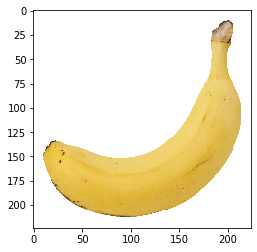

numpy array size (224, 224, 3)
image array size (1, 224, 224, 3)


RuntimeError: `get_session` is not available when TensorFlow is executing eagerly.

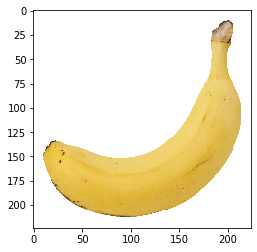

In [105]:
import PIL
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import decode_predictions
# from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
#resnet 초기의 입력값이 다음 연산들에게 지속적으로 영향을 준다

#전처리
filename = 'banana.jpg'
#(224,224) 사이즈 fix
original = load_img(filename, target_size=(224,224))
print('PIL image size', original.size)
plt.imshow(original)
plt.show()
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
print('numpy array size' , numpy_image.shape)

#차원확대가 생긴 이유?: 이미지 여러장을 처리하는 것이 전제조건인데 
#사진이 한장이니까 3차원->4차원으로 확장해줘야 한다
image_batch=np.expand_dims(numpy_image, axis=0)
print('image array size' , image_batch.shape)

#prepare the image for the resnet50 model
#dense을 이용해서 모델을 생성=>resnet을 이용해서 모델 생성
#label=>확률 : 1
precessed_image = resnet50.preprocess_input(image_batch.copy())
#sotfmax 확률(상위 3개로 예측)
resnet_model = resnet50.ResNet50(weights = 'imagenet')
predictions = resnet_model.predict(precessed_image) 
label = decode_predictions(predictions, top=3) #labeling , top=3 상위세개로 제한
#원래는 5개 출력
print(label)

In [70]:
# tf.keras
# fine-tuning : FFNN 부분만 학습

In [94]:
from numpy.random import randn
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib.image import imread
from keras.preprocessing import image
# tf.enable_eager_execution()
AUTOTUNE = tf.data.experimental.AUTOTUNE
data_dir = 'C:/Users/ICT01_03/Downloads/전달/flowers/flower_photos'
data_dir = pathlib.Path(data_dir)
label_names ={'daisy':0,'dandelion':1,'roses':2,'sunflowers':3,'tulips':4}
label_key=['daisy','dandelion','roses','sunflowers','tulips']

In [95]:
all_images = list(data_dir.glob('*/*'))
all_images = [str(path) for path in all_images]
random.shuffle(all_images)
# pathlib: 디렉터리의 경로를 관리하는 라이브러리
all_labels=[label_names[pathlib.Path(path).parent.name] for path in all_images]
data_size = len(all_images)
train_test_split=(int)(data_size*0.2) # 80:20
x_train = all_images[train_test_split:]
x_test = all_images[:train_test_split]
y_train = all_labels[train_test_split:]
y_test = all_labels[:train_test_split]
img_size = 160
batch_size = 32

In [96]:
def _parse_data(x,y):
    image = tf.read_file(x) # 파일에는 헤더 파일(압축 방법)
    image = tf.image.decode_jpeg(image, channels= 3) # 컬러
    image = tf.cast(image,tf.float32)
    image = (image/127.5) -1  # 이미지를 -1 ~ 1 값으로
    image = tf.image.resize(image, (img_size, img_size)) # 이미지 사이즈 통일
    return image,y 
def _input_fn(x,y):
    ds = tf.data.Dataset.from_tensor_slices((x,y)) # 기본 단위 요소로 분해. 데이터셋을 생성.
    ds = ds.map(_parse_data) # 데이터마다 함수를 적용할 때 사용
    ds = ds.shuffle(buffer_size=data_size) # 충분한 공간 확보. 버퍼: 거쳐가는 기억공간
    ds = ds.repeat() # 데이터가 부족하면 처음부터 다시 시작
    ds = ds.batch(batch_size) # mini batch 사이즈
    ds = ds.prefetch(buffer_size=AUTOTUNE) # 32x3 or 32x5 - 3장할지 5장할지 알아서 결정해라
    return ds
train_ds = _input_fn(x_train,y_train)
validation_ds = _input_fn(x_test, y_test)

In [97]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
VGG16_MODEL = tf.keras.applications.VGG16(input_shape = IMG_SHAPE, 
                                          include_top = False, weights = 'imagenet')
# include_top=False : pooling 으로 1000개 분류하기 전에 모델셋팅 가져오기

In [98]:
VGG16_MODEL.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # flatten 가중치
prediction_layer = tf.keras.layers.Dense(len(label_names), activation='softmax') # ffn의 가중치는 학습

In [99]:
model = tf.keras.Sequential([VGG16_MODEL, global_average_layer, prediction_layer])

In [100]:
# tf.train.AdamOptimizer()
# sparse_categorical_crossentropy 희소행렬
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [101]:
history = model.fit(train_ds, epochs = 100, steps_per_epoch=2)

Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
2/2 [==============================] - 11s 5s/step - loss: 1.7895 - acc: 0.1250
Epoch 2/100
2/2 [==============================] - 0s 197ms/step - loss: 1.7481 - acc: 0.1250
Epoch 3/100
2/2 [==============================] - 0s 196ms/step - loss: 1.5826 - acc: 0.2031
Epoch 4/100
2/2 [==============================] - 0s 185ms/step - loss: 1.6781 - acc: 0.1875
Epoch 5/100
2/2 [==============================] - 0s 202ms/step - loss: 1.6239 - acc: 0.1719
Epoch 6/100
2/2 [==============================] - 0s 195ms/step - loss: 1.5406 - acc: 0.2812
Epoch 7/100
2/2 [==============================] - 0s 194ms/step - loss: 1.5409 - acc: 0.4531
Epoch 8/100
2/2 [==============================] - 0s 195ms/step - loss: 1.5924 - acc: 0.2500
Epoch 9/100
2/2 [==============================] - 0s 185ms/step - loss: 1.5656 - acc: 0.3281
Epoch 10/100
2/2 [==============================] - 0s 201ms/s

KeyError: 'val_acc'

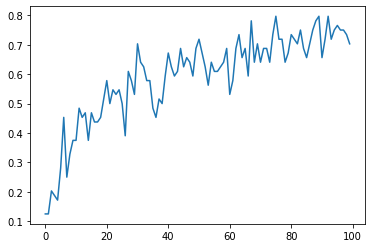

In [104]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()